#### Student Name: Vivian
#### Student ID: A17442498


# Assignment 0
### From Midi to Audio and Back, Transcription from Audio 


Instructions:

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be completed individually.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook as a PDF and your Mozart Dice Game MIDI.

Make sure to mark the page with your solution for each problem on Gradescope. Any problems without the correct pages marked may receive a score of 0.

Midi to pianoroll
--------

In [22]:
from __future__ import division
%pip install pretty_midi
%pip install librosa
%pip install setuptools

import numpy as np
import matplotlib.pyplot as plt
import pretty_midi
import librosa
import librosa.display
import soundfile as sf

import sys
import argparse
import numpy as np
import pretty_midi
import librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Record using a simple midi software a short sequence of musical notes (midi keystrokes).

Have at least 6 different notes, organized into two or more voices with few simultaneous overlapping notes or simple chords.

See Pretty-Midi documentation http://craffel.github.io/pretty-midi/

(128, 600)


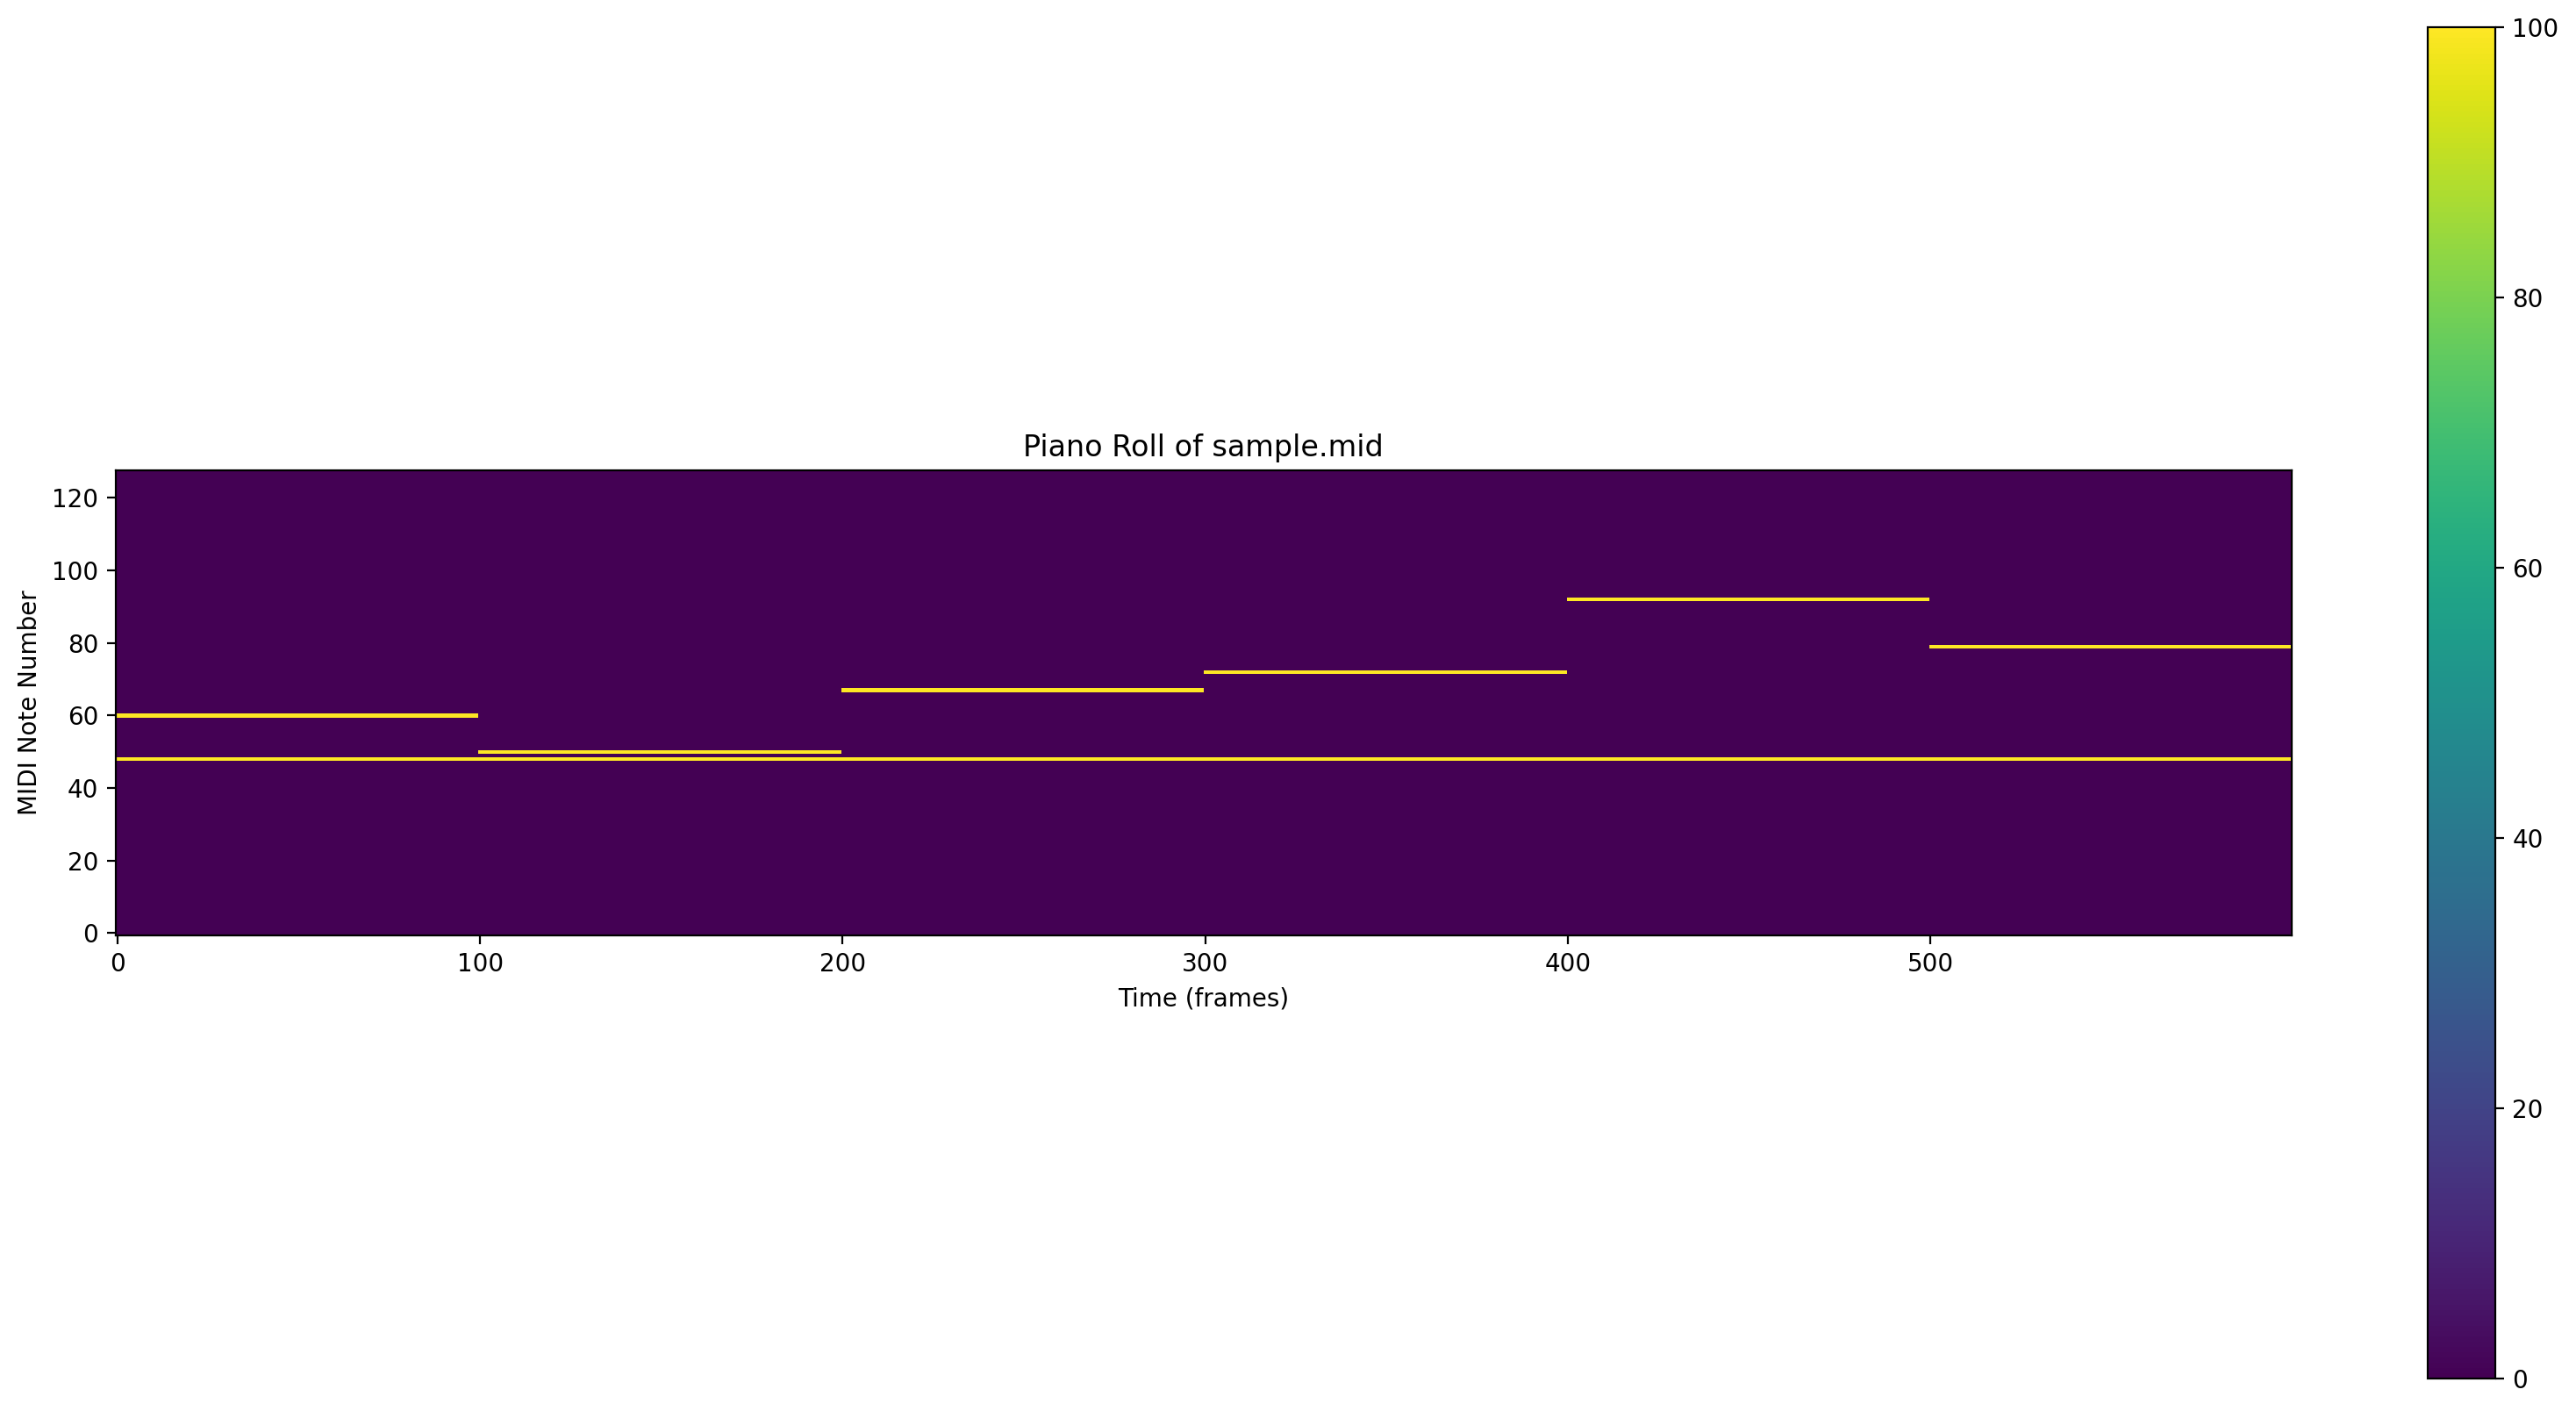

In [23]:
# Add notes (pitch, start, end)
import matplotlib.pyplot as plt
notes = [
    (60, 0.0, 0.5), 
    (50, 0.5, 1.0),  
    (67, 1.0, 1.5), 
    (72, 1.5, 2.0),  
    (92, 2.0, 2.5), 
    (79, 2.5, 3.0), 
    (48, 0.0, 3.0)   
]

piano = pretty_midi.Instrument(program=0) 

for pitch, start, end in notes:
    note = pretty_midi.Note(velocity=100, pitch=pitch, start=start, end=end)
    piano.notes.append(note)

midi = pretty_midi.PrettyMIDI()

midi.instruments.append(piano)
midi.write("sample.mid")

# Load and analyze the MIDI
f = "sample.mid"
midi_data = pretty_midi.PrettyMIDI(f)
fs = 200
piano_matrix = midi_data.get_piano_roll(fs=fs)

# Plot the piano roll
print(np.shape(piano_matrix))
plt.figure(figsize=(20, 10))
plt.imshow(piano_matrix[:, :1000], origin="lower")
plt.title("Piano Roll of sample.mid")
plt.xlabel("Time (frames)")
plt.ylabel("MIDI Note Number")
plt.colorbar()
plt.show()

##### Question 1 [10 points]
Write down the note names, play times and durations from the midi file you recorded, and match them to note coordinates in the plot. 
Explain how the plot and the notes are related.

You can use a program such as MuseScore to print the midi file in music notation. Note that there might be some difference in the typesetting, such as note shifting and duration quantization. 

``Your response here``

**Notes extracted from sample.mid:**

| Note | MIDI Pitch | Start Time | Duration |
|------|------------|----------------|--------------|
| C4   | 60         | 0.0            | 0.5          |
| D3   | 50         | 0.5            | 0.5          |
| G4   | 67         | 1.0            | 0.5          |
| C5   | 72         | 1.5            | 0.5          |
| G#6  | 92         | 2.0            | 0.5          |
| G5   | 79         | 2.5            | 0.5          |
| C3   | 48         | 0.0            | 3.0          |

This sequence contains two voices:
- A sustained **bass voice** (C3) that plays for the 3 seconds.
- A melodic voice that plays distinct notes every 0.5 seconds from C4 up to G#6 and back to G5.

**How the plot and notes relate:**
- The **x-axis** represents time in frames. Since `fs = 200`, each second = 200 frames.
- The **y-axis** shows the MIDI note numbers:
  - C3 = 48
  - D3 = 50
  - C4 = 60
  - G#6 = 92
- Each **horizontal bar** in the plot corresponds to one note being held.
  - Its vertical position represents pitch.
  - Its horizontal length represents duration.
- The **long bar at y=48** spans all 600 frames — this is the sustained C3 bass note.




Audio Analysis with CQT
----

Using your midi software to record an audio file (synthesize the audio) from the midi file. Save it as "sample.wav"

In [24]:
# Replace sample.wav with your sound file
import pretty_midi
import soundfile as sf

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI("sample.mid")

soundfont_path = r"C:\Users\vivia\Downloads\FluidR3_GM\FluidR3_GM.sf2"

sr = 44100
# Synthesize to audio
y = midi_data.fluidsynth(sf2_path=soundfont_path)

# Save to WAV
sf.write("sample.wav", y, samplerate=sr)

print("Audio saved as sample.wav")

Audio saved as sample.wav


In [25]:
import IPython.display as ipd
ipd.Audio(data=y, rate=sr)

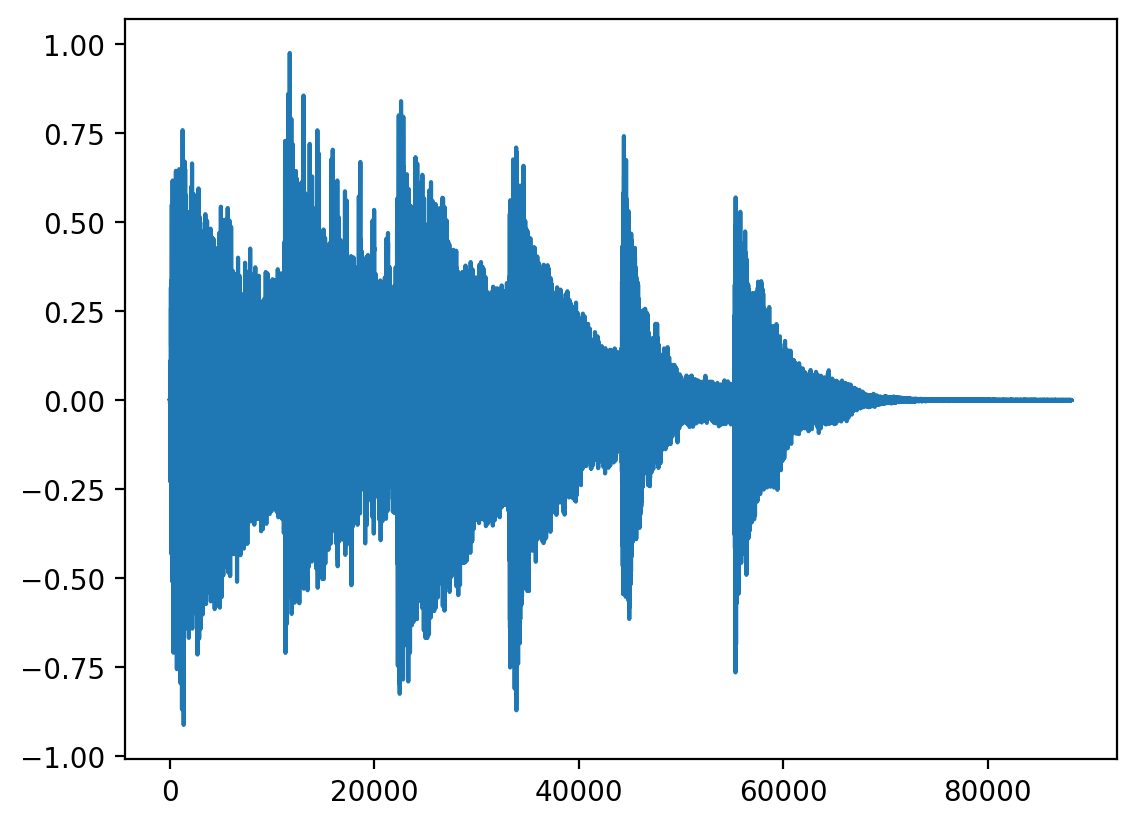

In [26]:
y, sr = librosa.load("sample.wav")
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y)

In [27]:

import librosa

min_midi = 24 # Minimum MIDI note to transcribe
max_midi = 107 # Maximum MIDI note to transcribe
threshold = 64 # Threshold to activate note on event, 0-127

cqt = librosa.cqt(y, sr=sr, fmin=min_midi, n_bins=max_midi - min_midi)

##### Question 2 [20 Points]
Plot the image of CQT analyis next to the piano roll. Explain how the axis in CQT and the axes in piano roll are related

See Librosa CQT documentation https://librosa.org/doc/0.9.2/generated/librosa.cqt.html?highlight=cqt#librosa.cqt

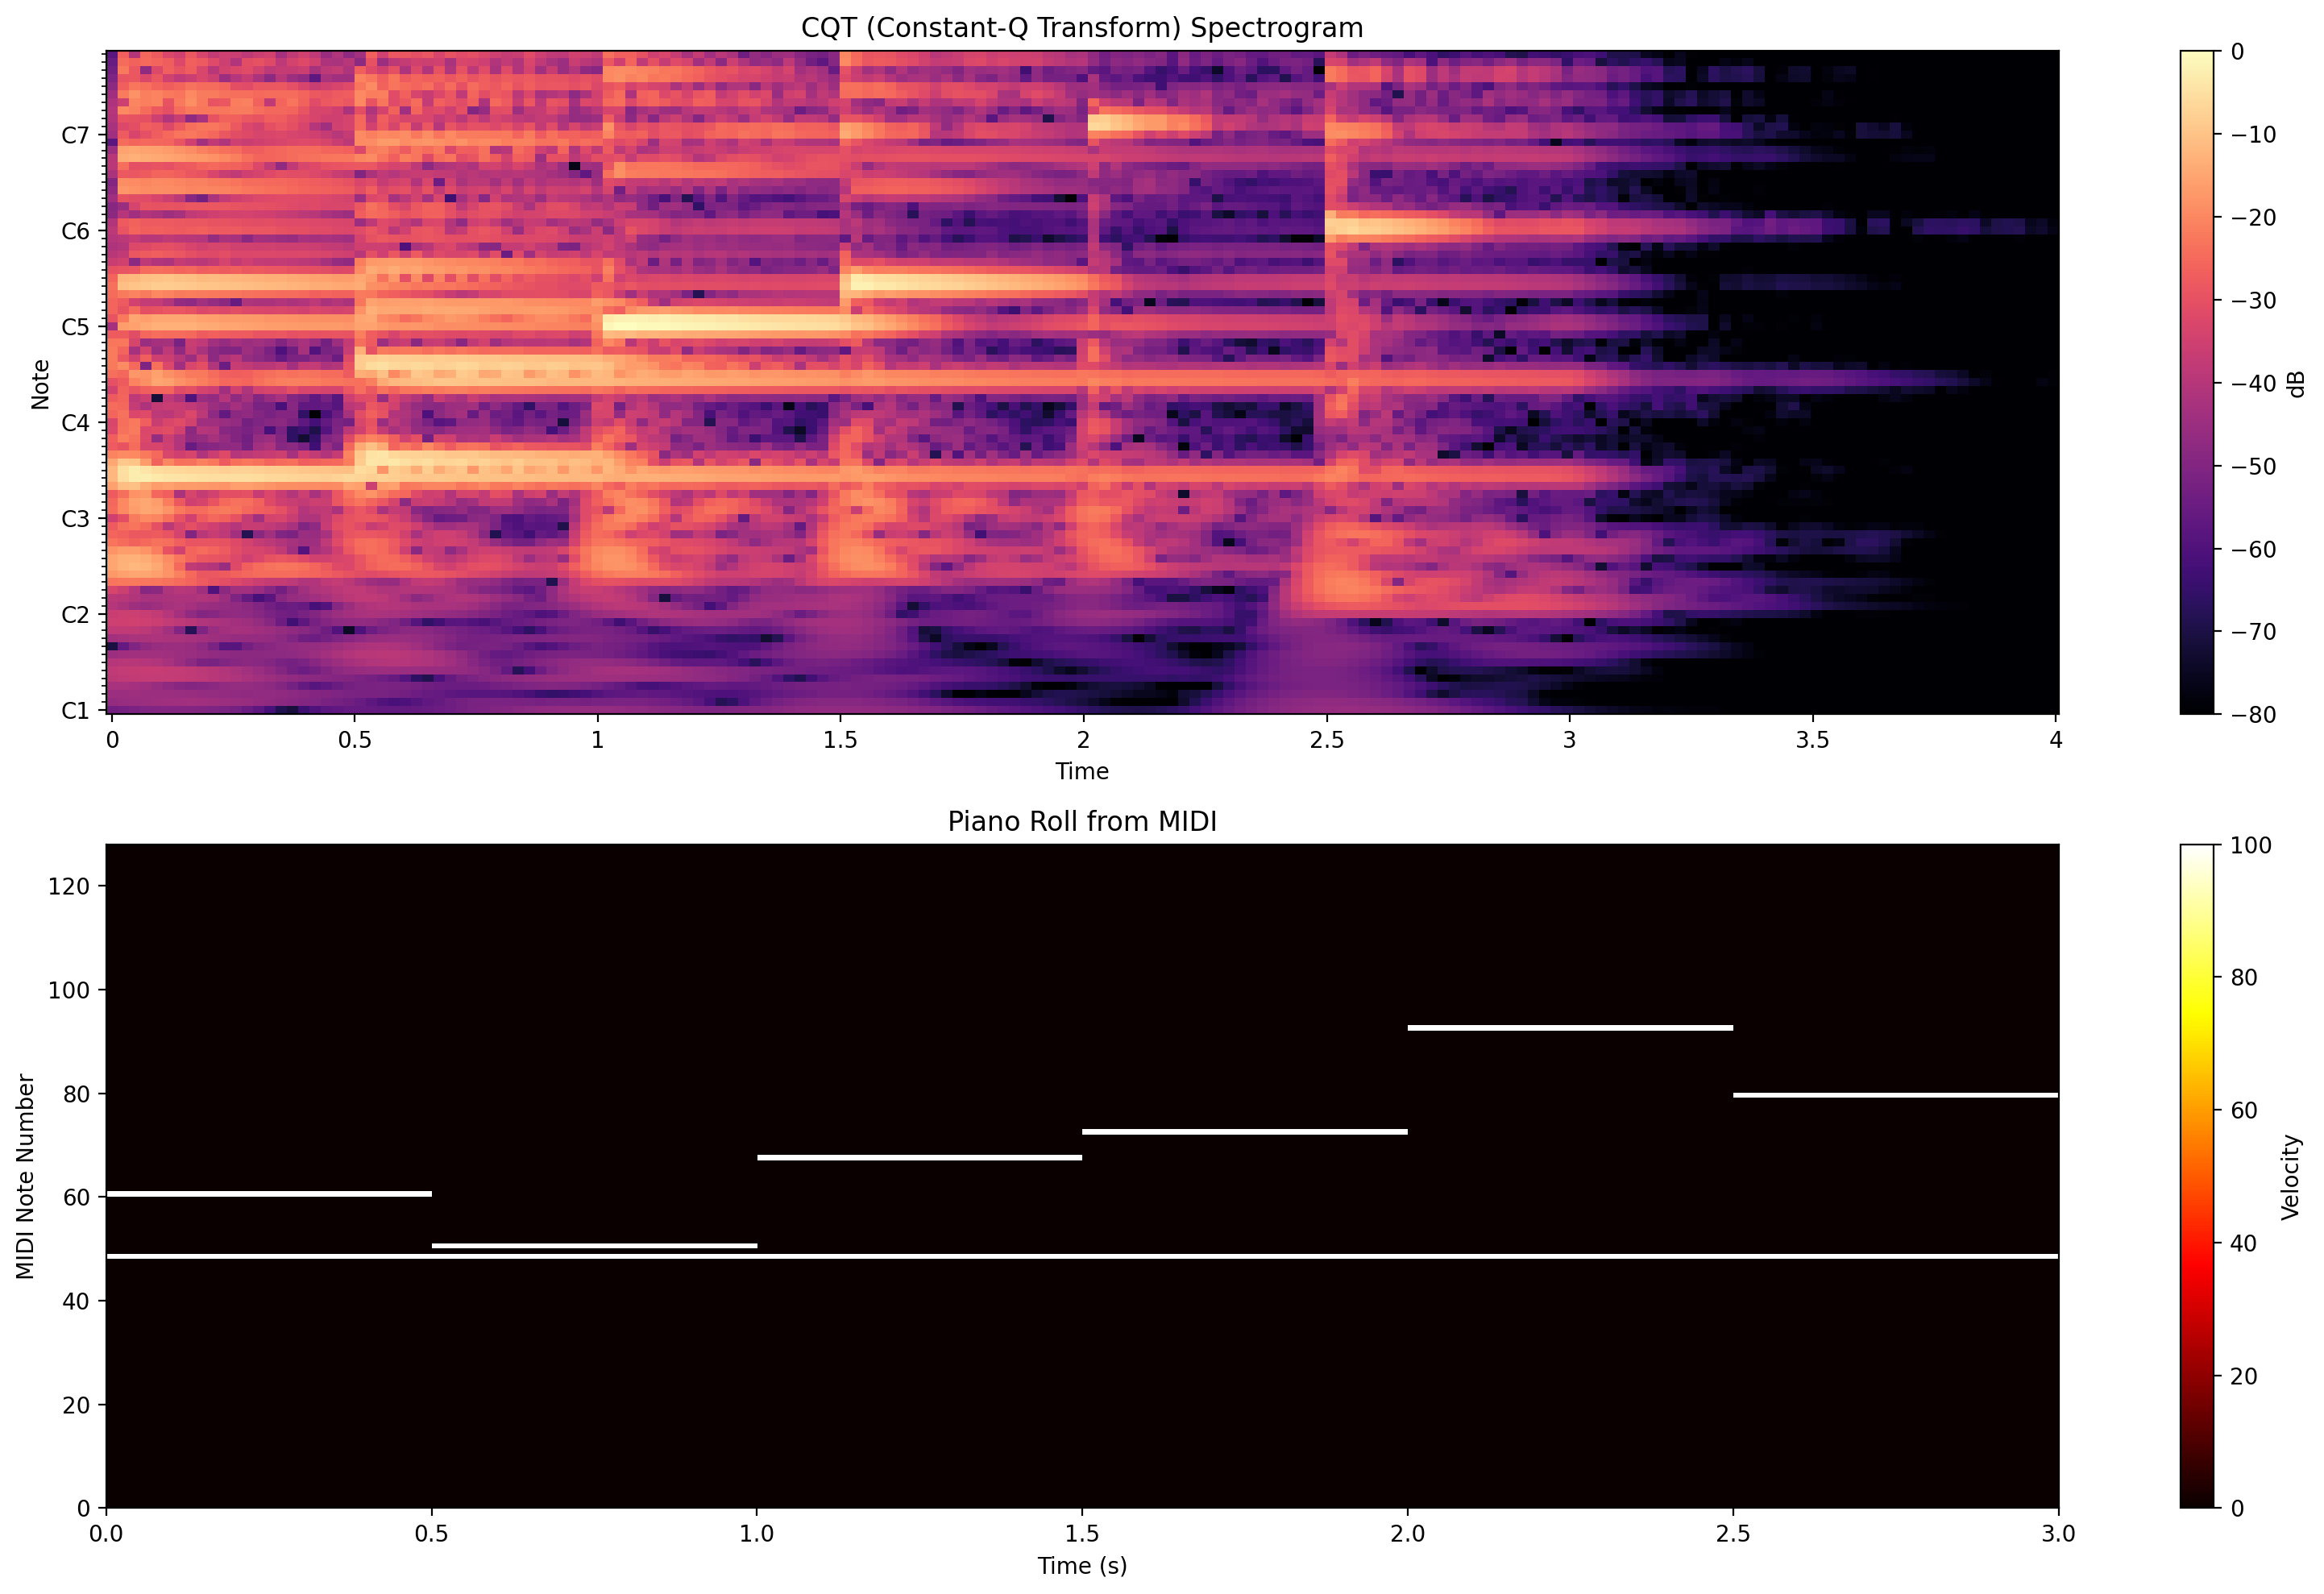

In [28]:
import numpy as np
import matplotlib.pyplot as plt
cqt_db = librosa.amplitude_to_db(np.abs(cqt), ref=np.max)
    
    
fs = 200  # frames per second
piano_roll = midi_data.get_piano_roll(fs=fs)
plt.figure(figsize=(16, 10))

# Plot CQT
plt.subplot(2, 1, 1)
librosa.display.specshow(cqt_db, sr=sr, x_axis='time', y_axis='cqt_note', fmin=librosa.midi_to_hz(24))
plt.title("CQT (Constant-Q Transform) Spectrogram")
plt.colorbar(label='dB')

# Plot Piano Roll
plt.subplot(2, 1, 2)
plt.imshow(piano_roll, origin="lower", aspect='auto', cmap='hot', extent=[0, piano_roll.shape[1] / fs, 0, 128])
plt.title("Piano Roll from MIDI")
plt.xlabel("Time (s)")
plt.ylabel("MIDI Note Number")
plt.colorbar(label='Velocity')

plt.tight_layout()
plt.show()

The Constant-Q Transform (CQT) and the piano roll visualization work together to give a complete picture of a musical piece. The piano roll represents the symbolic structure of MIDI data, showing which notes are played, when they start and end, and their velocity. Contrast, the CQT shows the actual frequency content of an audio signal , using a logarithmic scale for human auditory . By aligning the time and pitch axes of both plots, we can clearly see how MIDI note events from the piano roll translate into real acoustic energy in the CQT. This makes it useful for verifying or analyzing how symbolic note data becomes audible sound after synthesis.


Transcription experiment
---------

In [29]:
def cqt_to_piano_roll(cqt, min_midi, max_midi, threshold):
    '''Convert a CQT spectrogram into a piano roll representation by
     thresholding scaled magnitudes.

    Parameters
    ----------
    cqt : np.ndarray, shape=(max_midi-min_midi,frames), dtype=complex64
        CQT spectrogram of audio.
    min_midi : int
        Minimum MIDI note to transcribe.
    max_midi : int
        Maximum MIDI note to transcribe.
    threshold : int
        Threshold value to activate note on event, 0-127

    Returns
    -------
    piano_roll : np.ndarray, shape=(128,frames), dtype=int
        Piano roll representation on audio.

    '''
    piano_roll = np.abs(cqt)
    piano_roll = np.digitize(piano_roll,
                             np.linspace(piano_roll.min(),
                                         piano_roll.max(),
                                         127))
    piano_roll[piano_roll < threshold] = 0
    piano_roll = np.pad(piano_roll,
                        [(128 - max_midi, min_midi), (0, 0)],
                        'constant')
    return piano_roll


In [30]:
def piano_roll_to_pretty_midi(piano_roll, fs=100, program=0):
    '''Convert a Piano Roll array into a PrettyMidi object
     with a single instrument.

    Parameters
    ----------
    piano_roll : np.ndarray, shape=(128,frames), dtype=int
        Piano roll of one instrument
    fs : int
        Sampling frequency of the columns, i.e. each column is spaced apart
        by ``1./fs`` seconds.
    program : int
        The program number of the instrument.

    Returns
    -------
    midi_object : pretty_midi.PrettyMIDI
        A pretty_midi.PrettyMIDI class instance describing
        the piano roll.

    '''
    notes, frames = piano_roll.shape
    pm = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=program)

    # pad 1 column of zeros so we can acknowledge inital and ending events
    piano_roll = np.pad(piano_roll, [(0, 0), (1, 1)], 'constant')

    # use changes in velocities to find note on / note off events
    velocity_changes = np.nonzero(np.diff(piano_roll).T)

    # keep track on velocities and note on times
    prev_velocities = np.zeros(notes, dtype=int)
    note_on_time = np.zeros(notes)

    for time, note in zip(*velocity_changes):
        # use time + 1 because of padding above
        velocity = piano_roll[note, time + 1]
        time = time / fs
        if velocity > 0:
            if prev_velocities[note] == 0:
                note_on_time[note] = time
                prev_velocities[note] = velocity
        else:
            pm_note = pretty_midi.Note(
                velocity=prev_velocities[note],
                pitch=note,
                start=note_on_time[note],
                end=time)
            instrument.notes.append(pm_note)
            prev_velocities[note] = 0
    pm.instruments.append(instrument)
    return pm


##### Question 3 [40 points]

Call the appropriate function to translate cqt to piano roll

Set a threshold 0-127 on the CQT to extract the notes. You are free to suggest your own heuristics on how to set the threshold or cut out the notes from the audio analysis


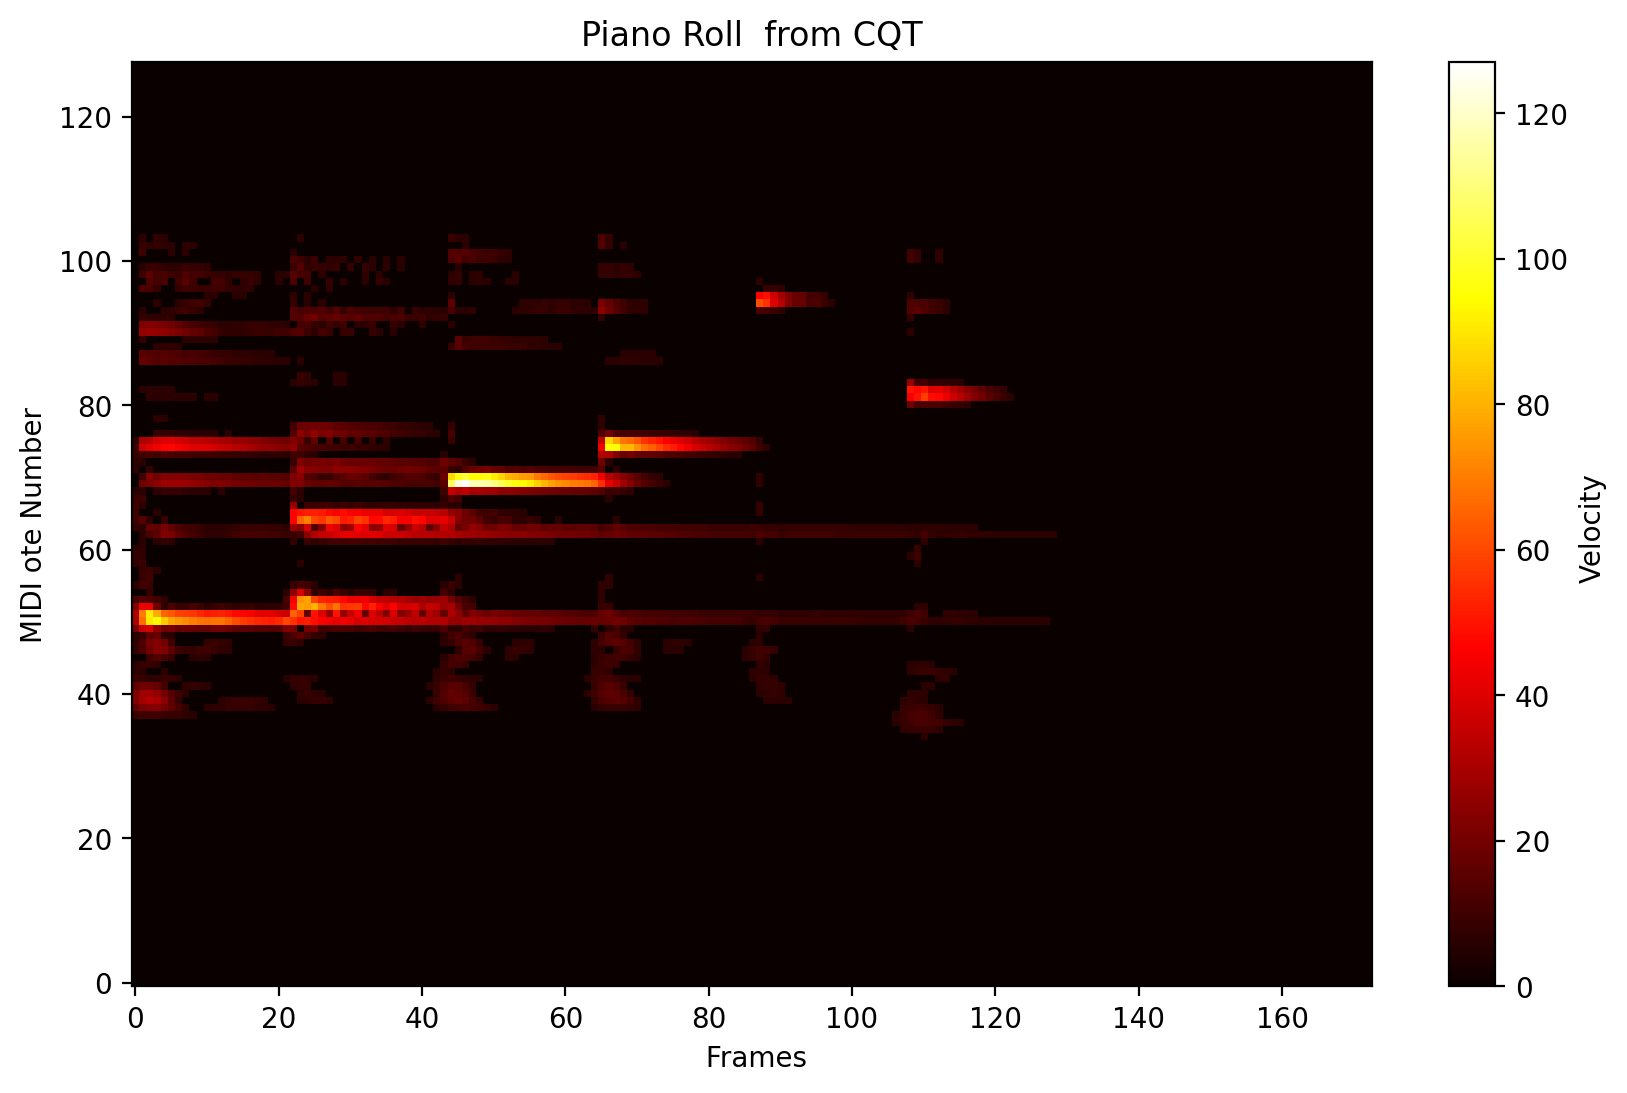

In [31]:

min_midi = 24
max_midi = 107

mag = np.abs(cqt)
flat = mag.flatten()
adaptive_threshold = np.digitize(np.percentile(flat, 85), np.linspace(flat.min(), flat.max(), 127))


piano_roll_from_cqt = cqt_to_piano_roll(cqt, min_midi, max_midi, threshold=adaptive_threshold)

# Optional: visualize it
plt.figure(figsize=(10, 6))
plt.imshow(piano_roll_from_cqt, origin="lower", aspect="auto", cmap="hot")
plt.title("Piano Roll  from CQT")
plt.xlabel(" Frames")
plt.ylabel("MIDI ote Number")
plt.colorbar(label="Velocity ")
plt.show()


##### Question 4 [20 points]

Generate midi from piano roll. In order to do so, determine the sampling frequency of the columns paremeter in the appropriate function call.

Hint: use the number of samples and the sampling rate of the audio file to determine its duration. Then match the pianoroll size to matches the required duration.

In [37]:
audio = midi_data.fluidsynth(sf2_path=r"C:\Users\vivia\Downloads\FluidR3_GM\FluidR3_GM.sf2")

duration = len(audio) / sr 

num_columns = piano_roll_from_cqt.shape[1]


fs = num_columns / duration  

pm = piano_roll_to_pretty_midi(piano_roll_from_cqt, fs=fs, program=0)

pm.write("samplewav_to_midi.mid")

print(f"Duration: {duration:.2f} seconds")
print(f"Columns: {num_columns}")
print(f"Computed fs: {fs:.2f} Hz")
print("MIDI saved as samplewav_to_midi.mid")


Duration: 8.00 seconds
Columns: 173
Computed fs: 21.62 Hz
MIDI saved as samplewav_to_midi.mid


Download the midi result "samplewav_to_mid.mid" and open it in a midi editor, such as MuseScore

Open sample.mid in midi editor and play sample.wav on your computer
##### Questions 5 [10 points]:
Discuss the following aspects of your assignment:
1. Why did we use CQT?
2. How sample.mid amd samplewav_to_mid.mid compare?
3. What needs to be done to improve the result?



1. We used CQT because it provides a time–frequency representation that aligns well with musical pitch. Unlike the FFT, CQT has logarithmically spaced frequency bins, which closely match the 12-tone scale used in music. This makes it ideal for detecting musical notes and transcribing them to audio, especially when converting spectrograms into MIDI-like representations.
2. sample.mid contains the original MIDI data, which is precise, symbolic, and clean.samplewav_to_midi.mid is reconstructed from audio using CQT analysis. Wit captures the overall pitch and timing of many notes, it tends to be less accurate, with missing or spurious notes, and timing errors due to limitations in spectral thresholding and audio noise.
3. To improve the transcription, we could;, Use a deep learning models trained on note transcriptions, Increase the CQT resolution or apply harmonic separation to reduce interference.